# Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection & Analysis

In [2]:
# loading the data from csv file to a pandas DataFrame

In [3]:
insurance_dataset = pd.read_csv(r"insurance.csv")

In [4]:
# first 5 rows of the dataframe
insurance_dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [6]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# categorical features:
    -sex
    -Smoker
    -region

In [7]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# checking for duplicate values
insurance_dataset.duplicated().sum()

1

In [9]:
# drop duplicates values
insurance_dataset.drop_duplicates(inplace = True)

# Data Analysis

In [10]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\nikam\AppData\Local\Temp\ipykernel_7744\958206933.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


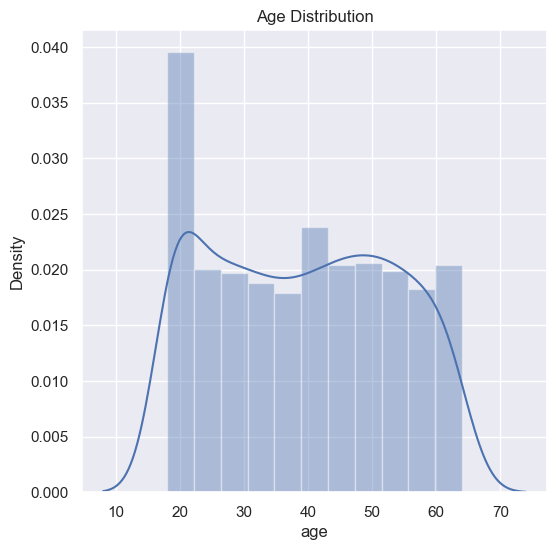

In [11]:
# distribution of age value
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insurance_dataset['age'])
plt.title("Age Distribution")
plt.show()

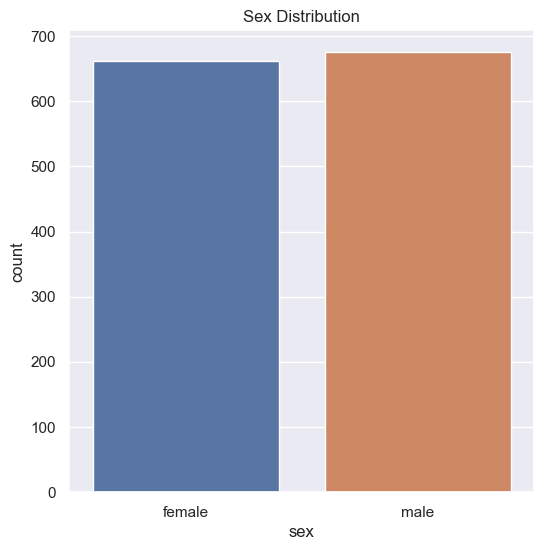

In [12]:
# Gender column
plt.figure(figsize = (6,6))
sns.countplot(x = 'sex',data = insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [13]:
insurance_dataset['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

C:\Users\nikam\AppData\Local\Temp\ipykernel_7744\3530657665.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


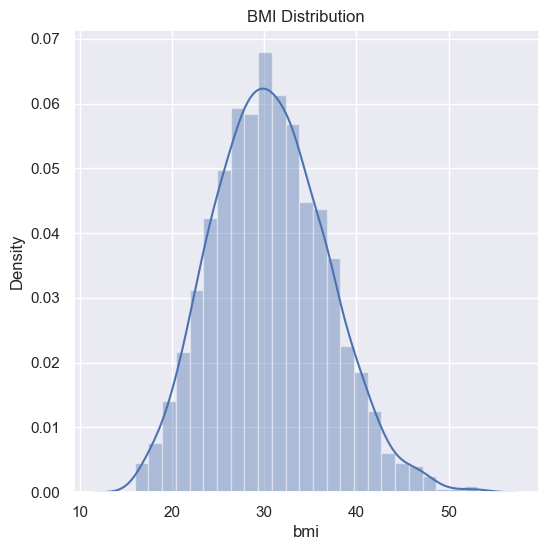

In [14]:
# bmi distribution
plt.figure(figsize = (6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

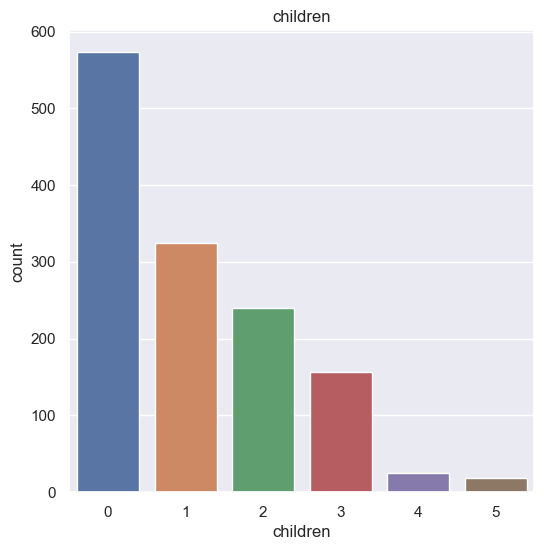

In [15]:
# children column
plt.figure(figsize = (6,6))
sns.countplot(x = 'children',data = insurance_dataset)
plt.title("children")
plt.show()

In [16]:
insurance_dataset['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

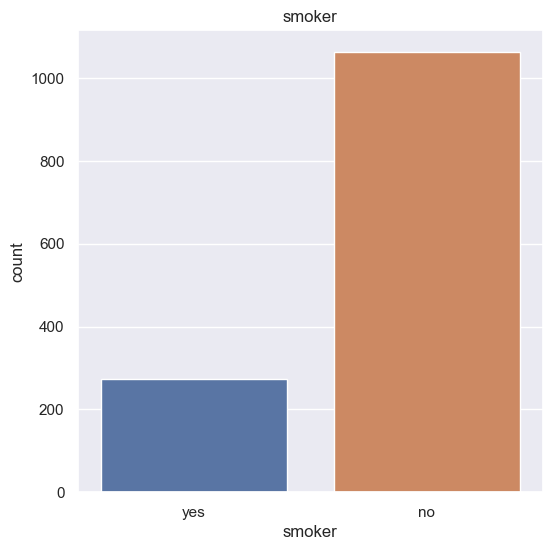

In [17]:
# Smoker column
plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker',data = insurance_dataset)
plt.title("smoker")
plt.show()

In [18]:
insurance_dataset['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

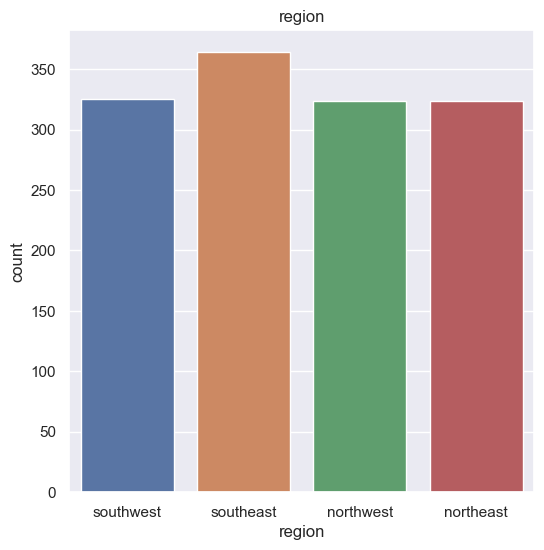

In [19]:
# region column
plt.figure(figsize = (6,6))
sns.countplot(x = 'region',data = insurance_dataset)
plt.title("region")
plt.show()

In [20]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

C:\Users\nikam\AppData\Local\Temp\ipykernel_7744\3597898182.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


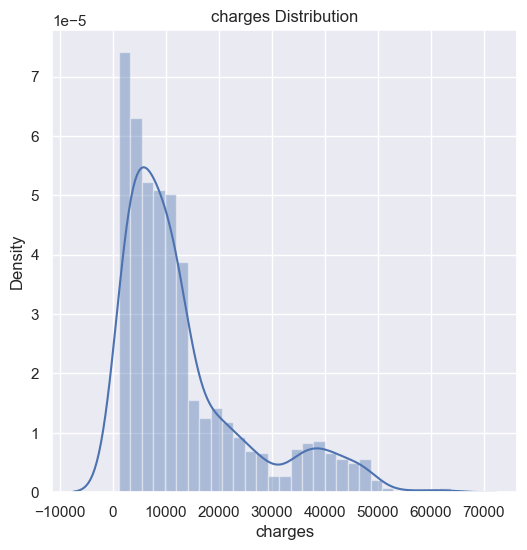

In [21]:
# charges distribution
plt.figure(figsize = (6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charges Distribution')
plt.show()

# Data pre-processing

Encoding the categorical features

In [22]:
# encoding 'sex' column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace = True)

In [23]:
# encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace = True)

In [24]:
# encoding 'region'column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace = True)

# Splitting the features and Target

In [25]:
x = insurance_dataset.drop(columns = 'charges',axis = 1)
y = insurance_dataset['charges']

In [26]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1337 rows x 6 columns]


In [27]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


# Splitting the data into Training & testing Data

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 120)

In [29]:
print(x.shape,x_train.shape,x_test.shape)

(1337, 6) (1069, 6) (268, 6)


# Model Training

Linear Regression

In [30]:
# loading the linear regression model
regressor = LinearRegression()

In [31]:
regressor.fit(x_train,y_train)

LinearRegression()

In [32]:
# prediction on training data
training_data_prediction = regressor.predict(x_train)

In [33]:
# R squared value
r2_train = metrics.r2_score(y_train,training_data_prediction)
print("R squared value:",r2_train)

R squared value: 0.7436104342548807


In [34]:
# prediction on test data
test_data_prediction = regressor.predict(x_test)

In [35]:
# R squared value
r2_test = metrics.r2_score(y_test,test_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.7778013370274486


In [36]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3722.35944284]
The insurance cost is USD  3722.359442841368


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
